In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import matplotlib as mpl

In [ ]:
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12               # 본문 크기
mpl.rcParams['axes.labelsize'] = 14          # 축 라벨
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['mathtext.fontset'] = 'cm'      # LaTeX 수식은 Computer Modern 유지
mpl.rcParams['axes.linewidth'] = 1.0         # 논문용 선 두께

def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]


In [24]:
mcs_rp0 = np.load('Simul/mcs_rp0.npz',allow_pickle=True)
mcs_rpdh = np.load('Simul/mcs_rpdh.npz',allow_pickle=True)

ms_rp0=mcs_rp0['ms']
K_rp0u=mcs_rp0['K_u']
K_rp0d=mcs_rp0['K_d']

ms_rpdh=mcs_rpdh['ms']
K_rpdhu=mcs_rpdh['K_u']
K_rpdhd=mcs_rpdh['K_d']

F_rp0u = interpolate.interp1d(K_rp0u,ms_rp0)
F_rpdhu = interpolate.interp1d(K_rpdhu,ms_rpdh)

In [26]:
np.min(ms_rp0),np.min(ms_rpdh)

(3.6479584000000003, 3.8645426)

In [2]:
DATA = np.load('Simul/RR_RP1000.npz',allow_pickle=True)
RP_us = DATA['RP']
RPl_us = DATA['RPl']
R_us = DATA['R']
R_0us = DATA['R0']
K_ = DATA['Ks']
m_ = DATA['ms']

In [3]:
RDH_us = (R_us - R_0us)/2

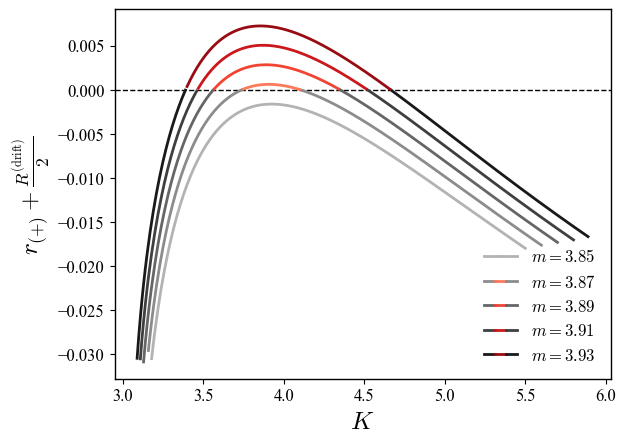

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

class JoinedTripleHandler(HandlerTuple):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # 중앙 위치
        y = height / 2.0
        n = len(orig_handle)
        seg_width = width / n   # 세 구간 균등 분할

        artists = []
        for i, handle in enumerate(orig_handle):
            x0 = xdescent + i * seg_width
            x1 = xdescent + (i + 1) * seg_width
            line = plt.Line2D(
                [x0, x1], [y, y],
                color=handle.get_color(),
                lw=handle.get_linewidth(),
                ls=handle.get_linestyle()
            )
            line.set_transform(trans)
            artists.append(line)

        return artists


# ---- 예시 (네 줄만 있어도 작동) ----
l = np.linspace(0.3, 0.9, 5)
cs = plt.cm.gray_r(l)
cs_r = plt.cm.Reds(l)

legends = []
m_list = []

for i in range(len(l)):
    A = RDH_us[385+i*2,:] + RP_us[385+i*2,:]
    l1, = plt.plot(K_, np.where(A < 0, A, np.nan), c=cs[i], lw=2)
    l2, = plt.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[i], lw=2)
    if len(np.where(A > 0)[0]) > 0:
        legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
    else:
        legends.append((l1, l1))
    m_list.append(m_[385+i*2])

plt.legend(
    legends,
    [f"$m={m:.2f}$" for m in m_list],
    handler_map={tuple: JoinedTripleHandler()},
    loc=4,
    frameon=False
)
plt.ylabel(r'$r_{(+)}+\frac{R^{(\rm{drift})}}{2}$', fontsize=18)
plt.xlabel(r'$K$', fontsize=18)
plt.axhline(0, c='k', lw=1, zorder=-10, ls='--')
plt.show()


In [62]:
DATAC500 = np.load('RS_ensembles_closer96_500_K7.npz')
DATAC1000 = np.load('RS_ensembles_closer96_1000_K7.npz')
DATAC5000 = np.load('RS_ensembles_closer98_5000_K7.npz')
DATAC10000 = np.load('RS_ensembles_closer96_10000_K7.npz')

In [80]:
DATA500 = np.load('RS_ensembles96_500_K7.npz')
DATA1000 = np.load('RS_ensembles96_1000_K7.npz')
DATA5000 = np.load('RS_ensembles98_5000_K7.npz')

[ 1.42708333  1.46875     1.53125     1.52083333  1.42708333  1.48958333
  1.59375     1.59375     1.66666667  1.4375      1.53125     1.44791667
  1.57291667  1.8125      1.47916667  1.58333333  1.36458333  1.47916667
  1.55208333  1.59375     1.60416667  1.55208333  1.5625      1.66666667
  1.69791667  1.52083333  1.59375     1.5         1.42708333  1.80208333
  1.61458333  1.48958333  1.53125     1.48958333  1.69791667  1.625
  1.6875      1.63541667  1.69791667  1.77083333  1.875       1.71875
  1.67708333  1.51041667  1.8125      1.94791667  1.79166667  1.89583333
  1.75        1.89583333  1.80208333  2.17708333  1.92708333  2.46875
  2.0625      1.65625     2.25        2.35416667  2.19791667  1.90625
  2.32291667  2.5625      2.75        2.90625     3.61458333  3.9375
  3.95833333  3.36458333  5.1875      4.16666667  4.125       5.86458333
  6.15625     5.80208333  5.66666667  6.1875      5.78125     6.3125
  7.51041667  7.76041667  8.          7.39583333  8.83333333 10.63541667


(0.0, 0.04)

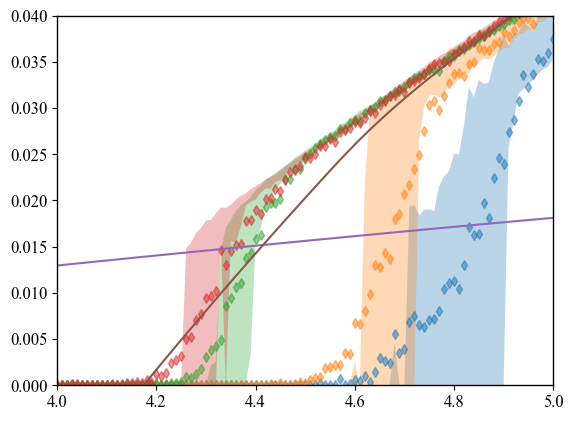

In [78]:
for DATA,N in [(DATAC500,500),(DATAC1000,1000),(DATAC5000,5000),(DATAC10000,10000)]:
    RP = DATA['N_RPLs']
    NRP = DATA['N_Ps']
    print(np.mean(NRP ,axis=0))
    RP = np.where(NRP > 10, RP,0)
    RP_mean = np.nanmean(RP,axis=0)
    RP_std = np.nanstd(RP,axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    plt.plot(DATA['ms'],RP_mean,'d',alpha=0.5,markersize=5)
    plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.3)

plt.plot(m_,Rd[:,700])
plt.plot(m_,RPl_us[:,700])
plt.xlim(4,5)
plt.ylim(0,0.04)


In [105]:
print(*DATA.keys())

N_R0s N_Rs N_RPs N_RMs N_RPLs N_RMLs N_0s N_Ps N_Ms N_rstd seeds_arr ms N K


(0.0, 102.9)

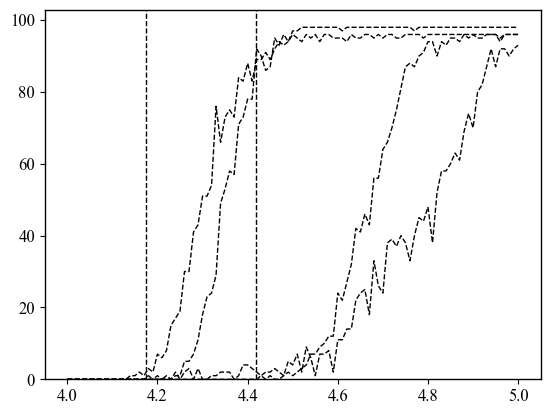

In [134]:
ms = DATAC5000['ms']
NC = 0.01
plt.plot(ms,np.sum(DATAC10000['N_Ps']>10000*NC,axis=0),color='k',ls='--',lw=1)
plt.plot(ms,np.sum(DATAC5000['N_Ps']>5000*NC,axis=0),color='k',ls='--',lw=1)
plt.plot(ms,np.sum(DATAC1000['N_Ps']>1000*NC,axis=0),color='k',ls='--',lw=1)
plt.plot(ms,np.sum(DATAC500['N_Ps']>500*NC,axis=0),color='k',ls='--',lw=1)
plt.axvline(F_rp0u(7),color='k',ls='--',lw=1)
plt.axvline(F_rpdhu(7),color='k',ls='--',lw=1)
plt.ylim(0,)

Text(0, 0.5, '$r_{(+)}^{(\\rm{lock})}$')

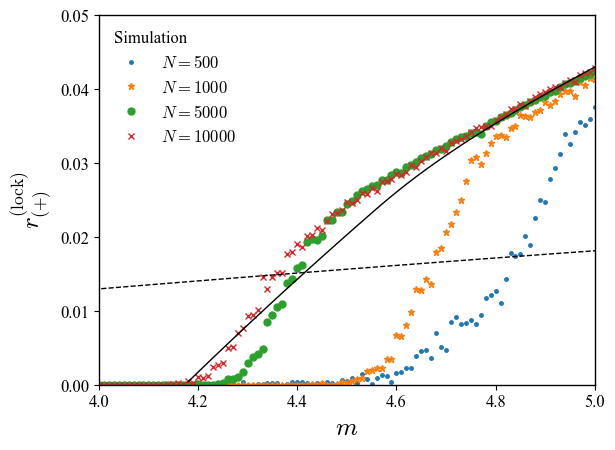

In [228]:
ax = plt.gca()
for DATA,N,marker in [(DATAC500,500,'.'),(DATAC1000,1000,'*'),(DATAC5000,5000,'o'),(DATAC10000,10000,'x')]:
    RP = DATA['N_RPLs']
    NRP = DATA['N_Ps']
    RP = np.where(NRP > N*NC, RP,0)
    RP_mean = np.nanmean(RP,axis=0)
    RP_std = np.nanstd(RP,axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    # plt.plot(DATA['ms'],RP_mean,marker,alpha=1,markersize=5)
    l, = plt.plot(DATA['ms'],RP_mean,marker,alpha=1,markersize=5,label=rf'$N={N}$')
    # f = plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.2)
    # labels.append(l)
    # plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.2)
leg1 = ax.legend(loc='upper left', frameon=False, title='Simulation')
leg1._legend_box.align = "left"
plt.plot(m_,Rd[:,700],color='k',lw=1,ls='--')
plt.plot(m_,RPl_us[:,700],color='k',ls='-',lw=1)
plt.xlim(4,5)
# plt.xlim(0,10)
plt.ylim(0,0.05)
plt.xlabel(r'$m$',fontsize=18)
plt.ylabel(r'$r_{(+)}^{(\rm{lock})}$',fontsize=18)


In [199]:
RP_us[418,700]

0.0003902934135719801

Text(0, 0.5, '$r_{(+)}$')

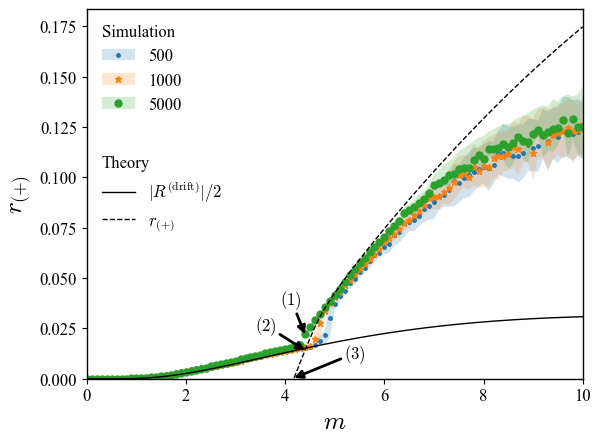

In [ ]:
labels = []
for DATA,N,marker in [(DATA500,500,'.'),(DATA1000,1000,'*'),(DATA5000,5000,'o')]:
    RP = DATA['N_RPs']
    NRP = DATA['N_Ps']
    RP_mean = np.nanmean(RP,axis=0)
    RP_std = np.nanstd(RP,axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    l, = plt.plot(DATA['ms'],RP_mean,marker,alpha=1,markersize=5)
    f = plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.2)
    labels.append((l,f))
leg1 = plt.legend(labels, [r'$N=500$',r'$N=1000$',r'$N=5000$'], loc='upper left', frameon=False,title='Simulation')
leg1._legend_box.align = "left" 
plt.plot(m_,Rd[:,700],color='k',lw=1,label=r'$|R^{(\rm{drift})}|/2$')
plt.plot(m_,RP_us[:,700],color='k',ls='--',lw=1,label=r'$r_{(+)}$')
leg2 = plt.legend(loc=6, frameon=False,title='Theory')
leg2._legend_box.align = "left" 
plt.gca().add_artist(leg1)
# plt.xlim(4,5)
# plt.arrow(4.4,RP_us[440,700],-0.1,0.1,head_width=0.1,head_length=0.01,fc='k',ec='k')

x0 = 4.4
y0 = RP_mean[44]
plt.annotate(r'$(1)$',xy=(x0, y0),xytext=(x0 - 0.5, y0 + 0.015),
    arrowprops=dict(
        arrowstyle='-|>',             # 깔끔한 화살표 모양
        lw=2,
        color='k',
        shrinkA=0, shrinkB=0))

x0 = 4.4
y0 = RP_us[440,700]
plt.annotate(r'$(2)$',xy=(x0, y0),xytext=(x0 - 1, y0 + 0.01),
    arrowprops=dict(
        arrowstyle='-|>',             # 깔끔한 화살표 모양
        lw=2,
        color='k',
        shrinkA=0, shrinkB=0))
x0 = 4.18
y0 = RP_us[418,700]
plt.annotate(r'$(3)$',xy=(x0, y0),xytext=(x0 + 1, y0 + 0.01),
    arrowprops=dict(
        arrowstyle='-|>',             # 깔끔한 화살표 모양
        lw=2,
        color='k',
        shrinkA=0, shrinkB=0))


plt.xlim(0,10)
plt.ylim(0,)
plt.xlabel(r'$m$',fontsize=18)
plt.ylabel(r'$r_{(+)}$',fontsize=18)


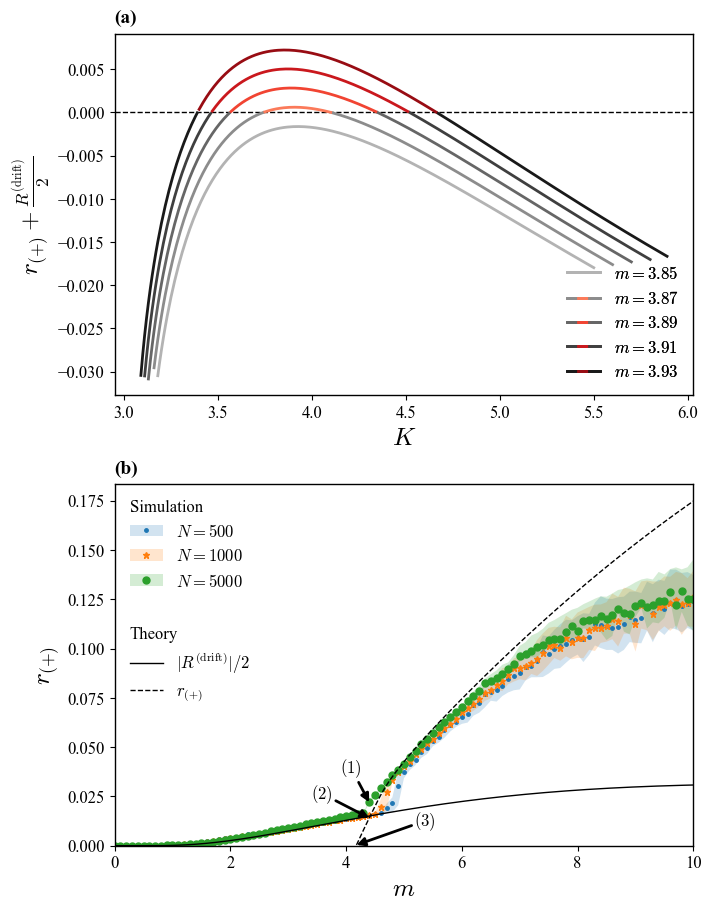

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

# --- 재사용 가능한 handler (위에서 쓰던 것) ---
class JoinedTripleHandler(HandlerTuple):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        y = height / 2.0
        n = len(orig_handle)
        seg_width = width / n
        artists = []
        for i, handle in enumerate(orig_handle):
            x0 = xdescent + i * seg_width
            x1 = xdescent + (i + 1) * seg_width
            line = plt.Line2D([x0, x1], [y, y],
                              color=handle.get_color(),
                              lw=handle.get_linewidth(),
                              ls=handle.get_linestyle())
            line.set_transform(trans)
            artists.append(line)
        return artists

# --- Figure + 2행 1열 서브플롯 (위: (a), 아래: (b)) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 9), constrained_layout=True)

# -------------------- (a) 위쪽 패널 --------------------
lvals = np.linspace(0.3, 0.9, 5)
cs = plt.cm.gray_r(lvals)
cs_r = plt.cm.Reds(lvals)

leg_handles = []
m_list = []

for i in range(len(lvals)):
    A = RDH_us[385 + i*2, :] + RP_us[385 + i*2, :]
    # 두 구간을 각각 ax1에 그림
    h1, = ax1.plot(K_, np.where(A < 0, A, np.nan), c=cs[i], lw=2)
    h2, = ax1.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[i], lw=2)
    # A>0 구간이 있으면 triple, 없으면 double로 legend handle 구성
    if np.any(A > 0):
        leg_handles.append((h1, h2, h1))
    else:
        leg_handles.append((h1, h1))
    m_list.append(m_[385 + i*2])

# legend: handler_map으로 tuple을 JoinedTripleHandler로 처리
leg_a = ax1.legend(
    leg_handles,
    [f"$m={m:.2f}$" for m in m_list],
    handler_map={tuple: JoinedTripleHandler()},
    loc='lower right',
    frameon=False,
)
# 제목 왼쪽 정렬
leg_a._legend_box.align = "left"
ax1.add_artist(leg_a)  # 명시적으로 추가

ax1.set_ylabel(r'$r_{(+)}+\frac{R^{(\rm{drift})}}{2}$', fontsize=18)
ax1.set_xlabel(r'$K$', fontsize=18)
ax1.axhline(0, c='k', lw=1, zorder=-10, ls='--')

# (a) 라벨 텍스트 - 왼쪽 위에 붙여서 표시
ax1.text(0.0, 1.02, '(a)', transform=ax1.transAxes, fontsize=14, fontweight='bold',
         va='bottom', ha='left')

# -------------------- (b) 아래 패널 --------------------
labels = []
for DATA, N, marker in [(DATA500,500,'.'), (DATA1000,1000,'*'), (DATA5000,5000,'o')]:
    RP = DATA['N_RPs']
    RP_mean = np.nanmean(RP, axis=0)
    RP_1Q = np.percentile(RP, 25, axis=0)
    RP_3Q = np.percentile(RP, 75, axis=0)
    Rd = (R_0us - R_us) / 2

    l, = ax2.plot(DATA['ms'], RP_mean, marker, alpha=1, markersize=5)
    f = ax2.fill_between(DATA['ms'], RP_1Q, RP_3Q, alpha=0.2)
    labels.append((l, f))

# Simulation legend for ax2
leg1 = ax2.legend(labels, [r'$N=500$', r'$N=1000$', r'$N=5000$'],
                  loc='upper left', frameon=False, title='Simulation')
leg1._legend_box.align = "left"

# Theory curves
line1, = ax2.plot(m_, Rd[:,700], color='k', lw=1, label=r'$|R^{(\mathrm{drift})}|/2$')
line2, = ax2.plot(m_, RP_us[:,700], color='k', ls='--', lw=1, label=r'$r_{(+)}$')

# Theory legend for ax2
leg2 = ax2.legend([line1, line2],
                  [r'$|R^{(\mathrm{drift})}|/2$', r'$r_{(+)}$'],
                  loc=6, frameon=False, title='Theory')
leg2._legend_box.align = "left"

# 동시에 두 legend를 표시
ax2.add_artist(leg1)

# 화살표/annotation들 (데이터 좌표 사용)
x0 = 4.4
y0 = np.nanmean(DATA5000['N_RPs'], axis=0)[44]  # RP_mean[44]에 대응
ax2.annotate(r'$(1)$', xy=(x0, y0), xytext=(x0 - 0.5, y0 + 0.015),
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0))

y0 = RP_us[440, 700]
ax2.annotate(r'$(2)$', xy=(x0, y0), xytext=(x0 - 1, y0 + 0.01),
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0))

x0b = 4.18
y0b = RP_us[418, 700]
ax2.annotate(r'$(3)$', xy=(x0b, y0b), xytext=(x0b + 1, y0b + 0.01),
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0))

ax2.set_xlim(0, 10)
ax2.set_ylim(bottom=0)
ax2.set_xlabel(r'$m$', fontsize=18)
ax2.set_ylabel(r'$r_{(+)}$', fontsize=18)

# (b) 라벨
ax2.text(0.0, 1.02, '(b)', transform=ax2.transAxes, fontsize=14, fontweight='bold',
         va='bottom', ha='left')
plt.savefig('fig4.pdf', dpi=300)
plt.show()
